<a href="https://colab.research.google.com/github/tomasplsek/AstroML/blob/main/03_sklearn2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Machine learning for astronomers in Python**




# 3. hands-on session: **Classification problem: from *Data* to *Validation***

## **Contents**

1. Obtain (good) data
1. Preprocess the data
1. Select features & reduce dimensions
1. Compare classifiers
1. Find best hyperparameters
1. Use all methods at once
1. Closs-validate

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **Obtain (good) data**

- enough datapoints
- representant dataset
- distinguishable features
- different values per feature
- not so much omitted datapoints

### **Random points**

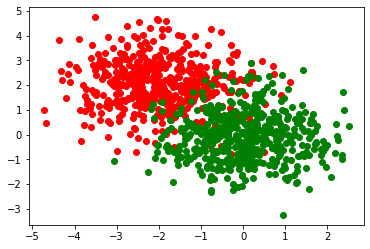

In [ ]:
# generate data
dist1 = np.random.multivariate_normal([-2, 2], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

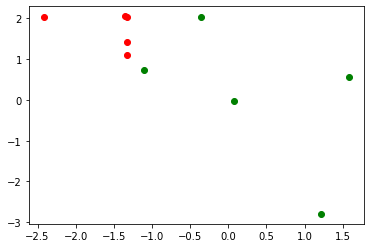

In [ ]:
# generate data
dist1 = np.random.multivariate_normal([-2, 2], [[1, 0], [0, 1]], size=5)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=5)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

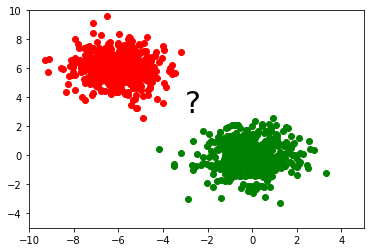

In [ ]:
# generate data
dist1 = np.random.multivariate_normal([-6, 6], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

plt.xlim(-10, 5)
plt.ylim(-5, 10)
plt.text(-3, 3, "?", fontsize=30);

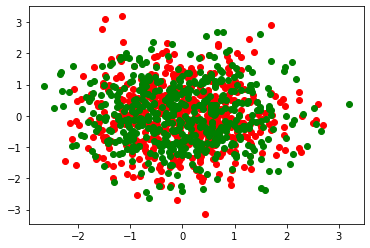

In [ ]:
# generate data
dist1 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

,Height,Width,Species
0,37,nan,Dog
1,16,16,Dog
2,22,11,Dog
3,19,nan,Dog
4,36,22,Dog
5,37,28,Dog
6,25,nan,Dog
7,18,15,Dog
8,18,15,Dog
9,31,nan,Dog


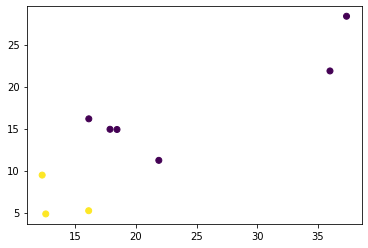

In [ ]:
X1 = np.hstack((np.random.uniform(15, 50, size=10), 
                np.random.uniform(5, 20, size=4)))

X2 = np.hstack((np.random.uniform(8, 30, size=10), 
                np.random.uniform(3, 10, size=4)))

X2[::3] = np.nan

y = 10*["Dog"] + 4*["Cat"]
labels = 10*[0] + 4*[1]

plt.scatter(X1, X2, c=labels)

pd.options.display.float_format = "{:,.2g}".format
pd.DataFrame({"Height" : X1, "Width" : X2, "Species" : y})

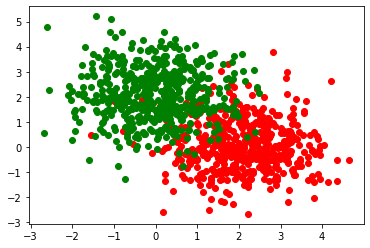

In [ ]:
# generate data
dist1 = np.random.multivariate_normal([2, 0], [[1, 0], [0, 1]], size=500)
dist2 = np.random.multivariate_normal([0, 2], [[1, 0], [0, 1]], size=500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green');

### **Random points with scikit-learn**

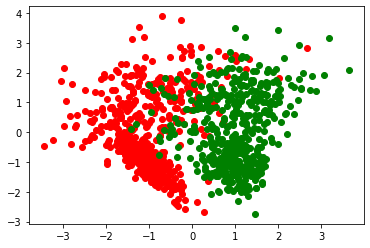

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_classes=2, n_features=2, n_informative=2, n_redundant=0, random_state=666)

i1, i2 = y == 0, y == 1

plt.scatter(X[:, 0][i1], X[:, 1][i1], color='red')
plt.scatter(X[:, 0][i2], X[:, 1][i2], color='green');

In [ ]:
make_classification?

### **Scikit-learn datasets**

#### **Iris dataset**

(array(['setosa', 'versicolor', 'virginica'], dtype='<U10'),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'])

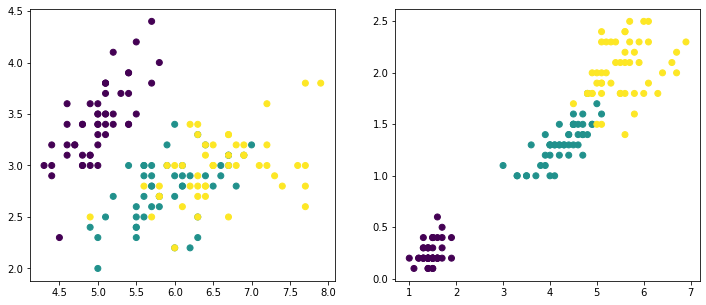

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

X, y = iris["data"], iris["target"]

i1, i2, i3 = y==0, y==1, y==2

plt.figure(figsize=(12,5))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c=y)

iris["target_names"], iris["feature_names"]

In [ ]:
!pip install corner
import corner

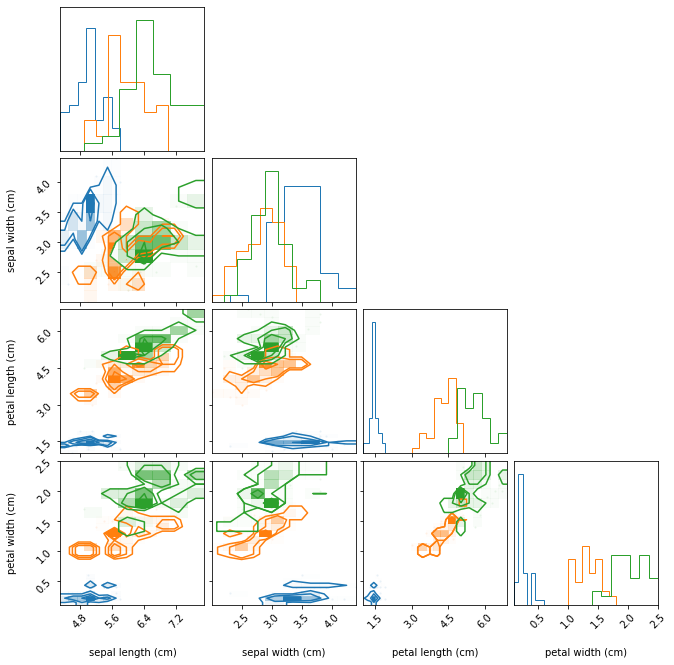

In [ ]:
df = pd.DataFrame(data=iris["data"],
                  columns=iris["feature_names"])

df_1 = df[iris["target"] == 0]
df_2 = df[iris["target"] == 1]
df_3 = df[iris["target"] == 2]

kw = {"bins" : [7, 7, 7, 7]}
fig = corner.corner(df_1, color="C0", **kw)
corner.corner(df_2, fig=fig, color="C1", **kw)
corner.corner(df_3, fig=fig, color="C2", **kw);

#### **Califoria housing prices dataset**

In [ ]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
y = data["target"]; data.pop("target"); data.pop("DESCR")
X = pd.DataFrame(data["data"], columns=data['feature_names'])
X["MedHouseVal"] = y
X

INFO:sklearn.datasets._california_housing:Downloading Cal. housing from https://ndownloader.figshare.com/files/5976036 to /root/scikit_learn_data


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3,41,7,1,3.2e+02,2.6,38,-1.2e+02,4.5
1,8.3,21,6.2,0.97,2.4e+03,2.1,38,-1.2e+02,3.6
2,7.3,52,8.3,1.1,5e+02,2.8,38,-1.2e+02,3.5
3,5.6,52,5.8,1.1,5.6e+02,2.5,38,-1.2e+02,3.4
4,3.8,52,6.3,1.1,5.6e+02,2.2,38,-1.2e+02,3.4
...,...,...,...,...,...,...,...,...,...
20635,1.6,25,5,1.1,8.4e+02,2.6,39,-1.2e+02,0.78
20636,2.6,18,6.1,1.3,3.6e+02,3.1,39,-1.2e+02,0.77
20637,1.7,17,5.2,1.1,1e+03,2.3,39,-1.2e+02,0.92
20638,1.9,18,5.3,1.2,7.4e+02,2.1,39,-1.2e+02,0.85


In [ ]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,2.1e+04,2.1e+04,2.1e+04,2.1e+04,2.1e+04,2.1e+04,2.1e+04,2.1e+04,2.1e+04
mean,3.9,29,5.4,1.1,1.4e+03,3.1,36,-1.2e+02,2.1
std,1.9,13,2.5,0.47,1.1e+03,10,2.1,2,1.2
min,0.5,1,0.85,0.33,3,0.69,33,-1.2e+02,0.15
25%,2.6,18,4.4,1,7.9e+02,2.4,34,-1.2e+02,1.2
50%,3.5,29,5.2,1,1.2e+03,2.8,34,-1.2e+02,1.8
75%,4.7,37,6.1,1.1,1.7e+03,3.3,38,-1.2e+02,2.6
max,15,52,1.4e+02,34,3.6e+04,1.2e+03,42,-1.1e+02,5


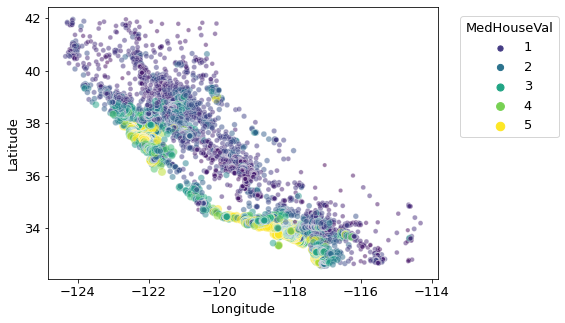

In [ ]:
import seaborn as sns

plt.figure(figsize=(7,5))
plt.rc("font", size=13)
sns.scatterplot(data=X, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.04, 0.99), loc="upper left");

### **Digits**

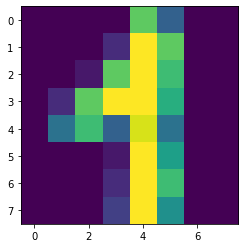

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
plt.imshow(digits.data[42].reshape(8,8));

(28, 28)

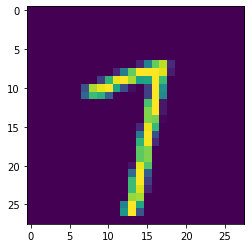

In [ ]:
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

plt.imshow(x_train[42]);
x_train[42].shape

### **Our dataset**

In [95]:
import requests
import wget

url = "https://drive.google.com/uc?id=1IoQfGFo13ZP2wTyp-xvzQvguPYhE8TWB"
#requests.get(url)
wget.download(url)

ModuleNotFoundError: ignored

## **Data preprocessing**

### What to do with the data:
- look at the data
- check data quality
- understand the data
- think of selection biases

## **Compare classifiers**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## **Ensemble methods**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import StackingClassifier #, RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

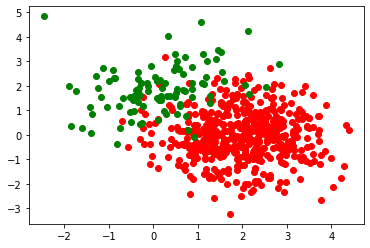

In [ ]:
data = 

X_train, X_test, y_train, y_test = train_test_split(data, labels)#, stratify=labels)

classifiers = [("svc", SVC()),
               ("DTC", DecisionTreeClassifier()),
               ("KNN", KNeighborsClassifier()),
               ("Bayes", GaussianNB())]

# train the model
model = StackingClassifier(classifiers)
#model = RandomForestClassifier()
#model = BaggingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# find accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.96

# **OpenAI**

### **Compare classifiers**

In [ ]:
'''
1. generate 2 dimensional data with two distinct classes.
2. classify the data using various classifiers.
3. compare the classifiers.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# generate data
np.random.seed(0)
x1 = np.random.normal(size=(100, 2))
x2 = np.random.normal(loc=2, size=(100, 2))
x = np.vstack((x1, x2))
y = np.array([0] * 100 + [1] * 100)

# split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# classifiers
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC()
]

# train and test
for clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

# plot
plt.scatter(x[:, 0], x[:, 1], c=y, s=100, lw=0, cmap='RdYlGn')
plt.show()

### **Grid search**

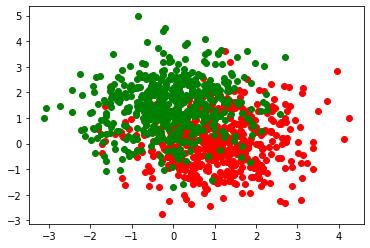

0.788
{'max_depth': 5, 'n_estimators': 30}
0.8093333333333333


In [ ]:
'''
1. generate 2 dimesional data with two distinct classes.
2. classify the data using random forest classifier.
3. find best hyperparameters using grid search.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# generate data
mean1 = [1, 0]
cov1 = [[1, 0.1], [0.1, 1]]
mean2 = [0, 1.5]
cov2 = [[1, 0.1], [0.1, 1]]
dist1 = np.random.multivariate_normal(mean1, cov1, 500)
dist2 = np.random.multivariate_normal(mean2, cov2, 500)

# plot data
plt.scatter(dist1[:, 0], dist1[:, 1], color='red')
plt.scatter(dist2[:, 0], dist2[:, 1], color='green')
plt.show()

# prepare data for classification
data = np.zeros((1000, 3))
data[:500, :2] = dist1
data[500:, :2] = dist2
data[500:, -1] = 1

# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(data[:, :2], data[:, -1])

# train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# predict
y_pred = model.predict(X_test)

# find accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# find best hyperparameters using grid search
from sklearn.model_selection import GridSearchCV

params = {'n_estimators': [10, 20, 30], 'max_depth': [2, 5, 7]}

grid_search = GridSearchCV(RandomForestClassifier(), params, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)